In [1]:
#importing important libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# EDA

In [3]:
bank = pd.read_excel("Banking_Call_Data.xlsx")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Data is having 17 columns & 45211 rows. mixed integer type and multi-valued attributes.
print(bank.info(), "\n")
print("shape---> ", bank.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None 

shape--->  (45211, 17)


In [5]:
#no duplicated data exists.
bank.duplicated().sum()

0

In [6]:
#null values does not exists.
bank.isnull().sum().sum()

0

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#age lies between 18 - 95 
print("min age: ", bank['age'].unique().min())
print("max age: ", bank['age'].unique().max())

min age:  18
max age:  95


In [9]:
#balance lies between 18 - 95 
print("min balance: ", bank['balance'].unique().min())
print("max balance: ", bank['balance'].unique().max())

min balance:  -8019
max balance:  102127


In [10]:
bank["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [11]:
#highly imbalanced dataset.
bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [12]:
# saperating numerical and object type columns
numerical_cols = bank.select_dtypes(include=[np.number]).columns
obj_cols = bank.columns.difference(numerical_cols)
print("Numerical Columns: ", numerical_cols,"\n")
print("Obj type columns: ", obj_cols)

Numerical Columns:  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object') 

Obj type columns:  Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'poutcome', 'y'],
      dtype='object')


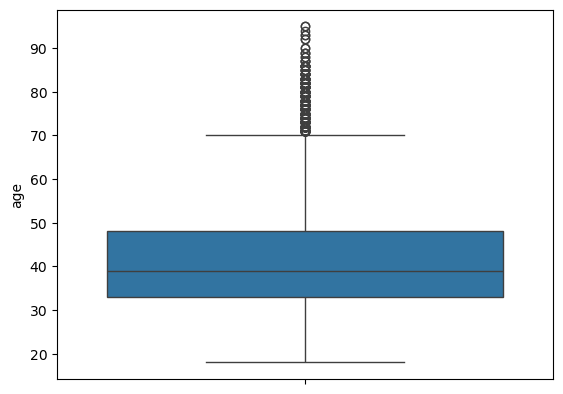

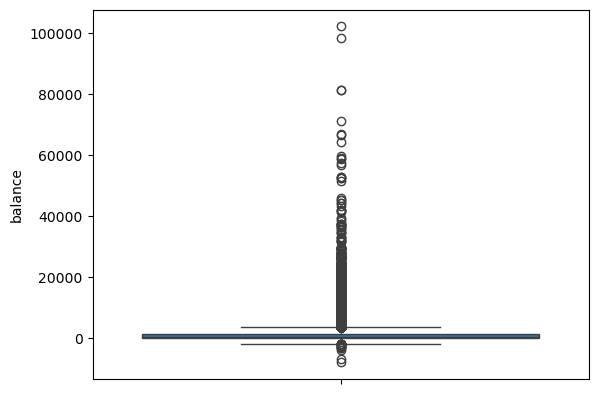

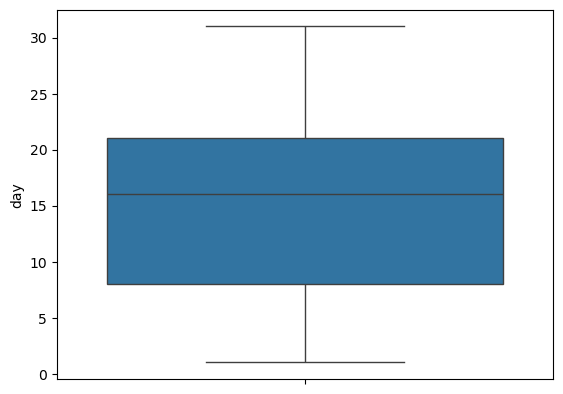

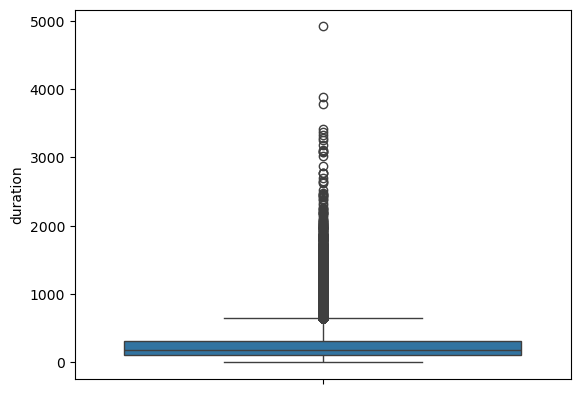

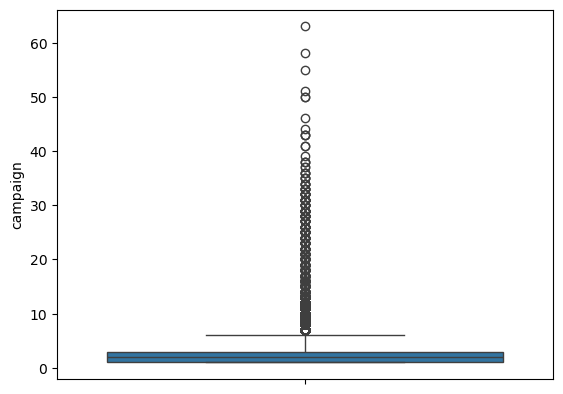

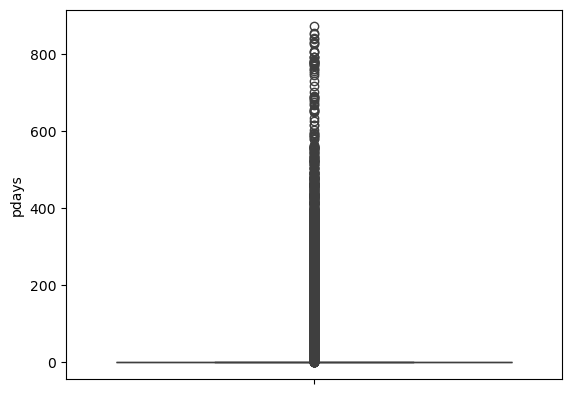

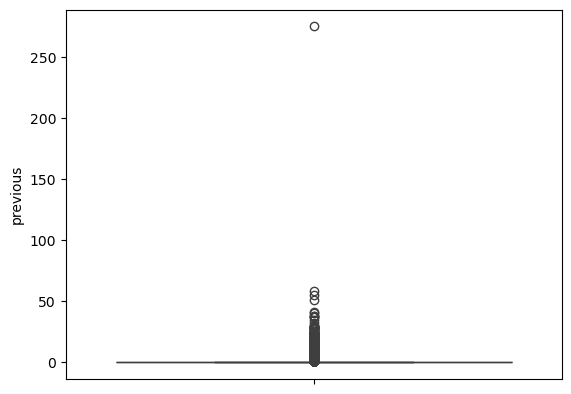

In [13]:
#outliers detection
#Every numerical columns have Significant outliers
def boxplots(col):
    sns.boxplot(bank[col])
    plt.show()
for i in numerical_cols:
        boxplots(i)

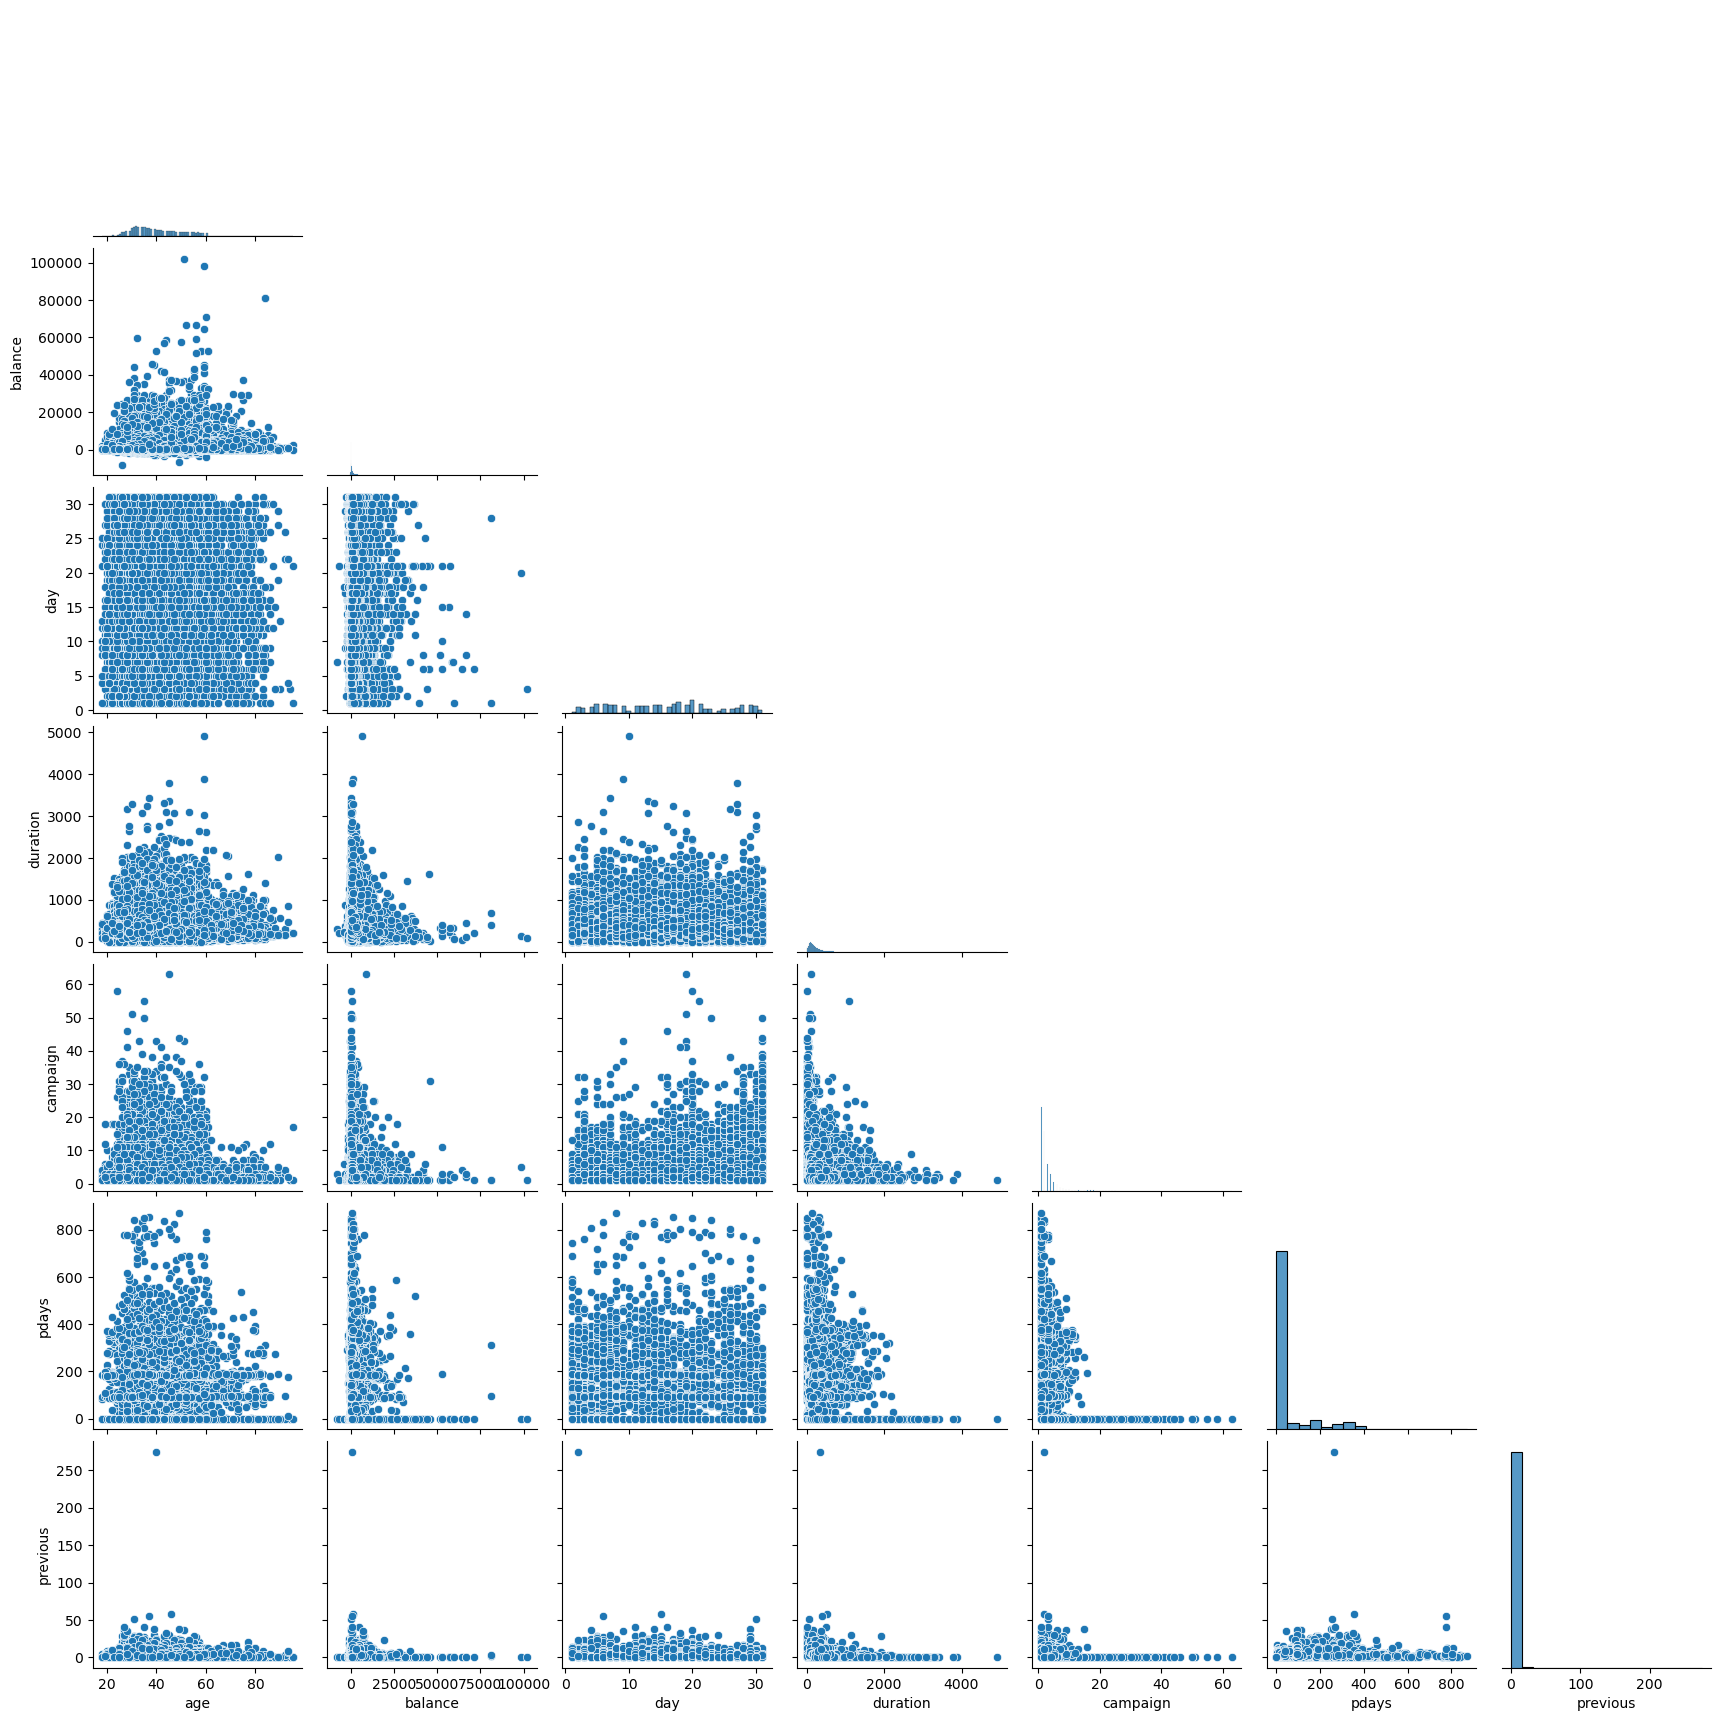

In [14]:
# Scatter plot for each Numerical feature.
sns.pairplot(bank[numerical_cols], corner=True)
plt.show()

# Data Engineering

In [16]:
#label encoded data for tree based algos
def label_encode(col):
    le = LabelEncoder()
    le.fit(col)
    print(col.name)
    return le.transform(col)

In [17]:
for i in obj_cols:
    bank[i] = label_encode(bank[i])

contact
default
education
housing
job
loan
marital
month
poutcome
y


In [18]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [19]:
y = bank["y"]
x = bank.drop(["y"], axis=1)

In [20]:
# outliers quantiles.
q1 = x.quantile(0.75)
q2 = x.quantile(0.25)
iqr = q1 - q2
ul = q1 + 1.5 * iqr
ll = q2 - 1.5 * iqr
print(ul, "\n")
print(ll)

age            70.5
job            16.0
marital         3.5
education       3.5
default         0.0
balance      3462.0
housing         2.5
loan            0.0
contact         5.0
day            40.5
month          15.5
duration      643.0
campaign        6.0
pdays          -1.0
previous        0.0
poutcome        3.0
dtype: float64 

age            10.5
job            -8.0
marital        -0.5
education      -0.5
default         0.0
balance     -1962.0
housing        -1.5
loan            0.0
contact        -3.0
day           -11.5
month          -4.5
duration     -221.0
campaign       -2.0
pdays          -1.0
previous        0.0
poutcome        3.0
dtype: float64


In [21]:
((x>ul) | (x<ll)).sum()

age           487
job             0
marital         0
education       0
default       815
balance      4729
housing         0
loan         7244
contact         0
day             0
month           0
duration     3235
campaign     3064
pdays        8257
previous     8257
poutcome     8252
dtype: int64

In [22]:
x[((x>ul) | (x<ll))] = np.NAN

In [23]:
# Appying KNN amputation
#filling outliers with nan values
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [24]:
# Replacing Nan values with their nearest neigbour value i.e outliers gone
bank_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
bank_imputed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,2.0,5.0,8.0,261.0,1.0,-1.0,0.0,3.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,2.0,5.0,8.0,151.0,1.0,-1.0,0.0,3.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,5.0,8.0,76.0,1.0,-1.0,0.0,3.0
3,47.0,1.0,1.0,3.0,0.0,1506.0,1.0,0.0,2.0,5.0,8.0,92.0,1.0,-1.0,0.0,3.0
4,33.0,11.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,8.0,198.0,1.0,-1.0,0.0,3.0


# Splitting test and traingin data 

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(bank_imputed, y, test_size = 0.2, stratify=y, random_state=36)

# Building Model (Random forest & Naive Bayes)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
nbc.fit(x_train, y_train)

GaussianNB()

In [32]:
pd.DataFrame({"features": x_train.columns, "importance": rf.feature_importances_}).sort_values(by="importance", ascending=False)

,features,importance
11,duration,0.227732
5,balance,0.165556
0,age,0.138227
9,day,0.121031
10,month,0.114444
1,job,0.065979
12,campaign,0.049879
3,education,0.033330
8,contact,0.031424
2,marital,0.029416


In [33]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [34]:
pred_train_nbc = nbc.predict(x_train)
pred_test_nbc = nbc.predict(x_test)

# Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
def create_confusion_martix(actual, pred):
    print(confusion_matrix(actual, pred))    

In [38]:
print("Random Forest Classifier", "\n")
print("Confusion Matrix Training")
create_confusion_martix(y_train, pred_train_rf)
print("Confusion Matrix Test")
create_confusion_martix(y_test, pred_test_rf)

Random Forest Classifier 

Confusion Matrix Training
[[31937     0]
 [    1  4230]]
Confusion Matrix Test
[[7832  153]
 [ 825  233]]


In [39]:
print("Accuracy on Training Dataset:", accuracy_score(y_train, pred_train_rf))
print("Accuracy on Testing Dataset: ",  accuracy_score(y_test, pred_test_rf))

Accuracy on Training Dataset: 0.9999723512497235
Accuracy on Testing Dataset:  0.891850049762247


In [40]:
print("Naive Bays Classifier", "\n")
print("Confusion Matrix Training")
create_confusion_martix(y_train, pred_train_nbc)
print("Confusion Matrix Test")
create_confusion_martix(y_test, pred_test_nbc)

Naive Bays Classifier 

Confusion Matrix Training
[[30625  1312]
 [ 3352   879]]
Confusion Matrix Test
[[7650  335]
 [ 851  207]]


In [41]:
print("Accuracy on Training Dataset:", accuracy_score(y_train, pred_train_nbc))
print("Accuracy on Testing Dataset: ",  accuracy_score(y_test, pred_test_nbc))

Accuracy on Training Dataset: 0.8710462287104623
Accuracy on Testing Dataset:  0.8688488333517638


In [42]:
print("Classification_report Training:")
print(classification_report(y_train, pred_train_rf), "\n")
print("Confusion Matrix Testing: ")
print(classification_report(y_test, pred_test_rf))

Classification_report Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168
 

Confusion Matrix Testing: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.60      0.22      0.32      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



# Building Model (SVM & Logistic Regression)

In [44]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## SVM

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score

In [48]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [49]:
y_pred_test_svc = svm_model.predict(X_test_scaled)
y_pred_train_svc = svm_model.predict(X_train_scaled)

In [50]:
print("Accuracy on Training Dataset:", accuracy_score(y_test, y_pred_test_svc))
print("Accuracy on Testing Dataset: ", accuracy_score(y_train, y_pred_train_svc))

Accuracy on Training Dataset: 0.8839986730067455
Accuracy on Testing Dataset:  0.8845941163459412


In [51]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_svc))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.71      0.01      0.03      1058

    accuracy                           0.88      9043
   macro avg       0.80      0.51      0.48      9043
weighted avg       0.86      0.88      0.83      9043



## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_lg_test = log_reg.predict(X_test_scaled)
y_pred_lg_train = log_reg.predict(X_train_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_lg_test)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lg_test))

Accuracy: 0.8827

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7985
           1       0.49      0.06      0.10      1058

    accuracy                           0.88      9043
   macro avg       0.69      0.53      0.52      9043
weighted avg       0.84      0.88      0.84      9043



In [55]:
print("Accuracy on Training Dataset:", accuracy_score(y_train, y_pred_lg_train))
print("Accuracy on Testing Dataset: ",  accuracy_score(y_test, y_pred_lg_test))

Accuracy on Training Dataset: 0.8819121875691219
Accuracy on Testing Dataset:  0.8826716797522945
